In [20]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load data
df = pd.read_excel("../data/bandwidth_video_quality_with_bitrate.xlsx")
bandwidth = np.array(df["Bandwidth (Mbps)"]).reshape(-1, 1)
bitrate = np.array(df["Bitrate (Mbps)"])

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(bandwidth, bitrate, test_size=0.2, random_state=42)

# Standardize data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [6]:

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()


In [25]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

# Predict on test set
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)

# # Calculate metrics
# mae = mean_absolute_error(bitrate[-len(y_test):], y_pred)
# mse = mean_squared_error(bitrate[-len(y_test):], y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(bitrate[-len(y_test):], y_pred)

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R²): {r2:.2f}")

y_pred


Epoch 1/100


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7589 - val_loss: 0.3173
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4250 - val_loss: 0.2690
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3563 - val_loss: 0.2091
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3116 - val_loss: 0.1737
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2632 - val_loss: 0.1362
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1805 - val_loss: 0.1253
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1480 - val_loss: 0.1152
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1160 - val_loss: 0.0954
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0964 - val_loss: 0.0816
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1110 - val_loss: 0.0726
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0794 - val_loss: 0.0803
Epoch 12/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0882 - va

array([[ 3.4893553 ],
       [ 0.98200107],
       [-0.44714522],
       [ 5.6954393 ],
       [ 1.7986572 ],
       [ 1.7986572 ],
       [ 7.099274  ],
       [11.392193  ],
       [16.216347  ],
       [ 7.601764  ],
       [-0.1749265 ],
       [ 2.479203  ],
       [ 0.30145717],
       [35.5763    ],
       [ 2.2069814 ],
       [-0.71935916],
       [12.846046  ],
       [35.59811   ],
       [ 8.143025  ],
       [ 1.1181118 ],
       [ 7.8376303 ],
       [ 7.842597  ],
       [ 5.962838  ],
       [ 7.666313  ],
       [13.110384  ],
       [ 4.8263755 ],
       [ 7.6439667 ],
       [36.999508  ],
       [10.15862   ],
       [ 0.5736759 ],
       [ 1.9347651 ],
       [-0.44714332],
       [ 7.6340356 ],
       [ 3.0201533 ],
       [ 2.070872  ],
       [ 7.98412   ],
       [11.876809  ],
       [15.401306  ],
       [19.366365  ],
       [-0.5151956 ],
       [-0.5832517 ],
       [ 0.43756413],
       [ 7.872391  ],
       [ 9.541832  ],
       [ 8.170338  ],
       [ 6

In [26]:
# Predict
bandwidth_baru = np.array([random.randint(1, 100) for _ in range(10)]).reshape(-1, 1)
bandwidth_baru_scaled = scaler_X.transform(bandwidth_baru)
hasil_bitrate_scaled = model.predict(bandwidth_baru_scaled)
hasil_bitrate = scaler_y.inverse_transform(hasil_bitrate_scaled)
print(bandwidth_baru)
print("Prediksi Bitrate:", hasil_bitrate)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[[59]
 [26]
 [59]
 [12]
 [66]
 [92]
 [19]
 [64]
 [69]
 [56]]
Prediksi Bitrate: [[3.2888038 ]
 [1.0500538 ]
 [3.2888038 ]
 [0.09729315]
 [3.756758  ]
 [5.4948835 ]
 [0.5736759 ]
 [3.623059  ]
 [3.957311  ]
 [3.0873973 ]]


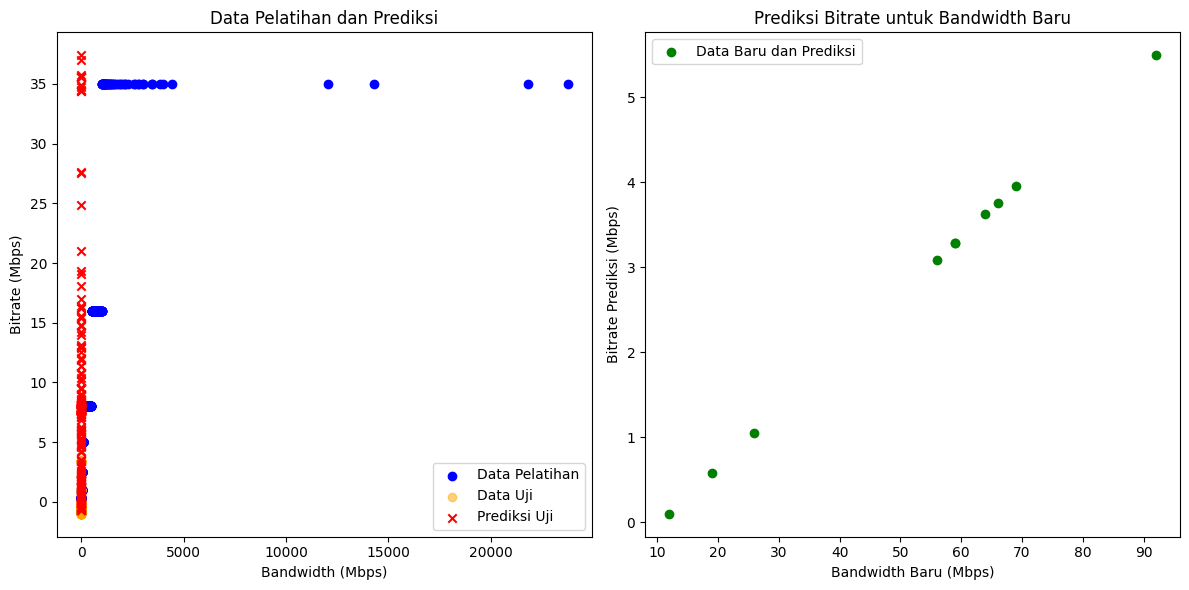

In [27]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot training data and predictions
plt.subplot(1, 2, 1)
plt.scatter(bandwidth, bitrate, color='blue', label='Data Pelatihan')
plt.scatter(X_test, y_test, color='orange', label='Data Uji', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Prediksi Uji', marker='x')
plt.xlabel('Bandwidth (Mbps)')
plt.ylabel('Bitrate (Mbps)')
plt.title('Data Pelatihan dan Prediksi')
plt.legend()

# Plot data baru dan hasil prediksi
plt.subplot(1, 2, 2)
plt.scatter(bandwidth_baru, hasil_bitrate, color='green', label='Data Baru dan Prediksi')
plt.xlabel('Bandwidth Baru (Mbps)')
plt.ylabel('Bitrate Prediksi (Mbps)')
plt.title('Prediksi Bitrate untuk Bandwidth Baru')
plt.legend()

plt.tight_layout()
plt.show()